In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
#df.Make = df['Make'].apply(lambda x: makes_list.index(x))
#df.Model = df['Model'].apply(lambda x: model_list.index(x))
#df.Type = df['Type'].apply(lambda x: type_list.index(x))

# le = preprocessing.LabelEncoder()
# df.Make = le.fit_transform(df.Make)
# df.Model = le.fit_transform(df.Model)
# df.Type = le.fit_transform(df.Type)

In [4]:
def max_combo_rsquared(db, combos):
    max_score = 0
    max_combo = []
    for combo in combos:
        columns_in_combo = []
        for columns in combo:
            columns_in_combo.append(columns)
            
        input_data = db[columns_in_combo]

        output_data = db.Price

        regr1 = linear_model.LinearRegression()
        regr1.fit(input_data, output_data)
        reg_score = (regr1.score(input_data, output_data))
        if reg_score > max_score:
            max_score = reg_score
            max_combo = combo
    print(max_score, max_combo)

# Tasks Part One

## 1. Find linear regression 


In [5]:
input_data = df[['Mileage']]
output_data = df.Price

regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)
print(regr1.coef_, regr1.intercept_)

[-0.1725205] 24764.5590061


/Users/David/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## 3. Find $R^{2}$ 

#### $R^{2}$ is well below .8, therefore we can assume that mileage is not a relevent factor

In [6]:
print(regr1.score(input_data, output_data))

0.0204634473235


## 2. Plot findings

#### The linear regression line seems to follow the general shape of the data even though we know $R^{2}$ is below .8.

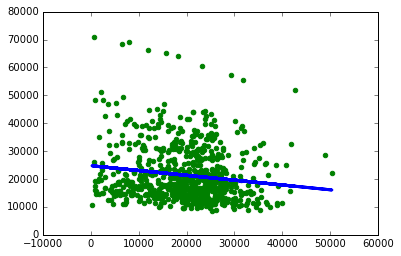

In [7]:
plt.scatter(input_data, output_data, color='green')
plt.plot(input_data, regr1.predict(input_data), color='blue', linewidth=3)

#### Polynomial Linear Regression shows us that mileage is not a good indicator of price, regardless of degree.

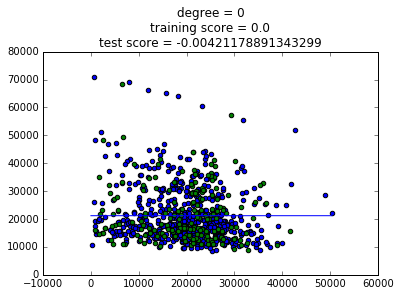

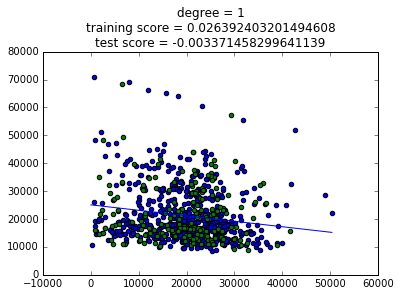

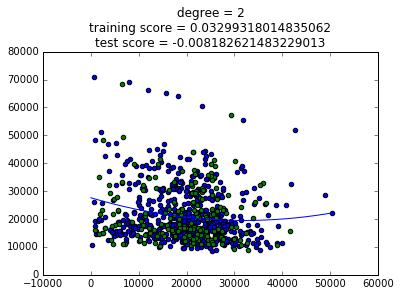

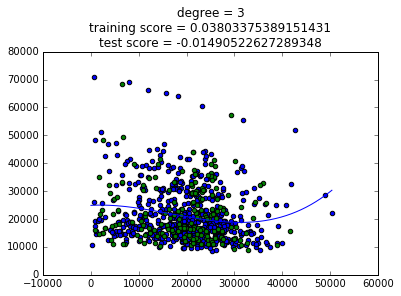

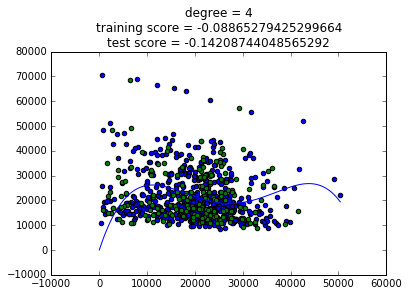

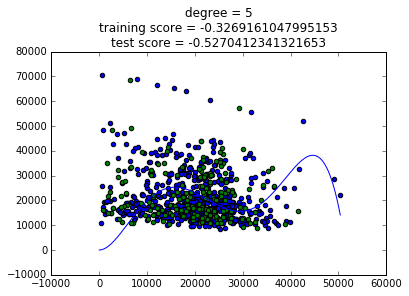

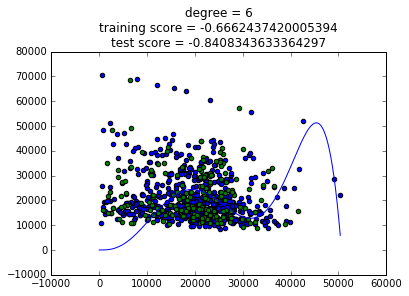

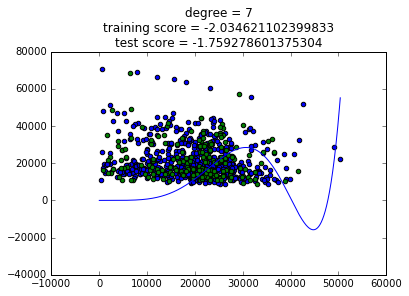

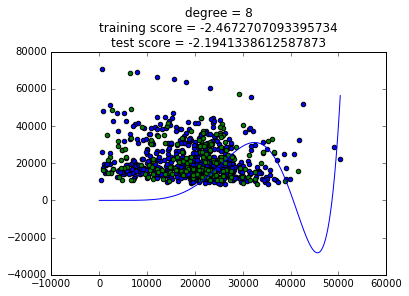

In [8]:
input_data = df[['Mileage']]
output_data = df.Price

train_X, test_X, train_y, test_y = train_test_split(input_data, output_data, random_state=101)
degrees = 8
for degree in range(degrees+1):
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', LinearRegression(fit_intercept=False))])

    #model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=101)

    model.fit(train_X, train_y)
        
    plt.scatter(train_X, train_y, c='blue')
    plt.scatter(test_X, test_y, c='green')

    train_r2 = model.score(train_X, train_y)
    test_r2 = model.score(test_X, test_y)
    plt.title('degree = {}\ntraining score = {}\ntest score = {}'.format(degree, train_r2, test_r2))
    plt.plot(model.predict([[x] for x in range(df['Mileage'].max())]))
    plt.show()

# Tasks Part Two

## 1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [9]:
input_data = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 
                 'Sound', 'Leather']]
output_data = df.Price

regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)
print(regr1.coef_, regr1.intercept_)


[ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03] 6758.7551436


## 2. Find the equation's $R^{2}$  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

#### Using multiple sets of data gives a better linear regression, but  $R^{2}$  is still well below .8.  Mileage, cylinders, liters, doors, cruise, sound, and leather together are not a good indicator of sale price.

In [10]:
print(regr1.score(input_data, output_data))

0.446264353673


## 3. Find the combination of the factors that is the best predictor for price.

#### I decided to check the correlation between each set of data and the price.  The most correlated pieces are Cylinders and Cruise.  Liter appears to be strongly correlated to price, but Liter and Cylinder are very strongly correlated so I did not include it.

In [11]:
df.corr()["Price"]

Price       1.000000
Mileage    -0.143051
Cylinder    0.569086
Liter       0.558146
Doors      -0.138750
Cruise      0.430851
Sound      -0.124348
Leather     0.157197
Name: Price, dtype: float64

In [12]:
possible_columns =['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 
                    'Sound', 'Leather']
                 

#### The best combinations of factors to predict price are below.  Cylinder would be the best predictor if we could only use one factor.  Cylinder also has the highest correlation.

In [13]:
count = 1
while count < len(possible_columns):
    combos = list(itertools.combinations(possible_columns, count))
    max_combo_rsquared(df, combos)
    count += 1

0.323859037595 ('Cylinder',)
0.383949132403 ('Cylinder', 'Cruise')
0.40380272694 ('Cylinder', 'Cruise', 'Leather')
0.422507421477 ('Mileage', 'Cylinder', 'Cruise', 'Leather')
0.436940215124 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')
0.445690921059 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')


#### Using Polynomial Linear Regression we can see that using a degree of 3 gives us the highest $R^{2}$ value.

In [14]:
train_X, test_X, train_y, test_y = train_test_split(input_data, output_data, random_state=101)
degrees = 8
for degree in range(degrees+1):
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', LinearRegression(fit_intercept=False))])
    
    model.fit(train_X, train_y)
    
    train_r2 = model.score(train_X, train_y)
    test_r2 = model.score(test_X, test_y)
    print('degree = {}\ntraining score = {}\ntest score = {}'.format(degree, train_r2, test_r2))

degree = 0
training score = 0.0
test score = -0.00421178891343299
degree = 1
training score = 0.45610066479620404
test score = 0.4097458978545687
degree = 2
training score = 0.7405201948694564
test score = 0.6654167441341277
degree = 3
training score = 0.8206004580352776
test score = 0.7329049500782772
degree = 4
training score = 0.7812487940905636
test score = 0.6547600088204563
degree = 5
training score = 0.353886455281588
test score = -0.05319142020502854
degree = 6
training score = 0.024571160543941595
test score = -0.7812595959956088
degree = 7
training score = -0.49801986633358397
test score = -1.4219499060029364
degree = 8
training score = -1.0611064443581317
test score = -2.5463632413970085


# Tasks, Part 3

## 1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.

#### pd.get_dummies transforms a category factor into a dataset of each category and its binary value. 

In [15]:
(pd.get_dummies(df.Make)).head()

,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df1 = df.join(pd.get_dummies(df.Make))
df1 = df1.join(pd.get_dummies(df.Model))
df1 = df1.join(pd.get_dummies(df.Type))

## 2. Find the best combination of factors to predict price.

#### Using the original factors plus the factors for make, model, and type gives us an $R^{2}$ of .98 which indicates that all of these factors together can give an accurate prediction of price.

In [17]:
input_data = df1[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 
                 'Sound', 'Leather', 'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn',
                 'Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
                  'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
                   'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
                   'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
                   'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
                   'L Series', 'Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'
                 ]]
output_data = df1.Price

regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)
print(regr1.coef_, regr1.intercept_)
print(regr1.score(input_data, output_data))

[ -1.79761908e-01   5.42379044e+02   1.29237519e+03  -1.27829701e+03
   2.42035608e+01   2.18363418e+02   3.27988648e+02  -3.16039326e+03
   1.30213147e+04  -4.88007742e+03  -4.67567935e+03   4.71023130e+03
  -5.01539600e+03  -4.61122096e+03   2.26749166e+02  -1.34597822e+03
   2.57005676e+03   3.77804366e+03  -6.53389096e+03  -3.46964696e+03
  -1.87689942e+02   2.99162869e+03   1.64428702e+04  -4.93611922e+03
  -3.94804525e+03  -2.89432746e+03  -2.94078233e+03   1.18477723e+04
   4.38170518e+02  -2.48428616e+03   3.75401387e+01   3.57062194e+02
   2.71553375e+02  -3.98758695e+03  -1.56899086e+03   5.52879392e+03
  -4.35664023e+03  -9.19870791e+02   4.76735849e+02   1.51108916e+03
   3.43085398e+03   1.90075746e+03  -2.60920515e+03  -2.67596496e+03
  -2.33943105e+03  -5.19546067e+02   3.40614520e+03  -3.34485968e+02
  -2.76699669e+03   2.14883530e+02] 25165.8247792
0.980476870245


#### Using Polynomial Linear Regression shows us that 1degrees gives us the highest $R^{2}$ value.  I only tested degrees 0-3 because the time to calculate was too high.

In [18]:
possible_columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 
                 'Sound', 'Leather', 'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn',
                 'Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
                  'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
                   'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
                   'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
                   'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
                   'L Series', 'Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'
                 ]

In [19]:
train_X, test_X, train_y, test_y = train_test_split(df1[possible_columns], output_data, random_state=101)
degrees = 2
for degree in range(degrees+1):
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', LinearRegression(fit_intercept=False))])
    
    model.fit(train_X, train_y)
    
    train_r2 = model.score(train_X, train_y)
    test_r2 = model.score(test_X, test_y)
    print('degree = {}\ntraining score = {}\ntest score = {}'.format(degree, train_r2, test_r2))

degree = 0
training score = 0.0
test score = -0.00421178891343299
degree = 1
training score = 0.9817787223386356
test score = 0.9750909745456686
degree = 2
training score = 0.9898216969807907
test score = -31.773690403621416


#### Whether or not a car is Cadillac is the best predictor, if we were only to use one factor to predict the price.  If we use  Liter, Cadillac, and SAAB the $R^{2}$ is over .80. 

In [20]:
count = 1
while count < 4:
    combos = list(itertools.combinations(possible_columns, count))
    max_combo_rsquared(df1, combos)
    count += 1

0.434672220558 ('Cadillac',)
0.671130893326 ('Cylinder', 'SAAB')
0.837198486334 ('Liter', 'Cadillac', 'SAAB')


###  It seems unlikely to me that Liter, Cadillac, and SAAB will be able to predict price, so I ran some regressions just using that data.

In [21]:
input_data = df1[['Liter', 'Cadillac', 'SAAB']]
output_data = df1.Price

regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)
print(regr1.coef_, regr1.intercept_)
print(regr1.score(input_data, output_data))

[  4800.37876056  17151.58310004  16455.01067448] 2723.09053575
0.837198486334


##  Polynomial Linear Regression shows that the test $R^{2}$ scores for Liter, Cadillac, and Saab is above .80 for each degree.  Therefore, we can say that  those three factors together are a decent predictor of sale price.

In [22]:
possible_columns = ['Liter', 'Cadillac', 'SAAB']

train_X, test_X, train_y, test_y = train_test_split(df1[possible_columns], 
                                                    output_data, random_state=101)
degrees = 4
for degree in range(degrees+1):
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', LinearRegression(fit_intercept=False))])
    
    model.fit(train_X, train_y)
    
    train_r2 = model.score(train_X, train_y)
    test_r2 = model.score(test_X, test_y)
    print('degree = {}\ntraining score = {}\ntest score = {}'.format(degree, train_r2, test_r2))

degree = 0
training score = 0.0
test score = -0.00421178891343299
degree = 1
training score = 0.8366810787909751
test score = 0.8342432226344552
degree = 2
training score = 0.8549615629112167
test score = 0.8471171083245412
degree = 3
training score = 0.8633497963865131
test score = 0.8481272370272868
degree = 4
training score = 0.8647456246613946
test score = 0.8481451378224064
